In [1]:
versioninfo()

Julia Version 1.9.0
Commit 8e630552924 (2023-05-07 11:25 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 16 × AMD Ryzen 7 PRO 4750U with Radeon Graphics
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-14.0.6 (ORCJIT, znver2)
  Threads: 2 on 16 virtual cores
Environment:
  JULIA_PKG_SERVER = https://mirrors.tuna.tsinghua.edu.cn/julia


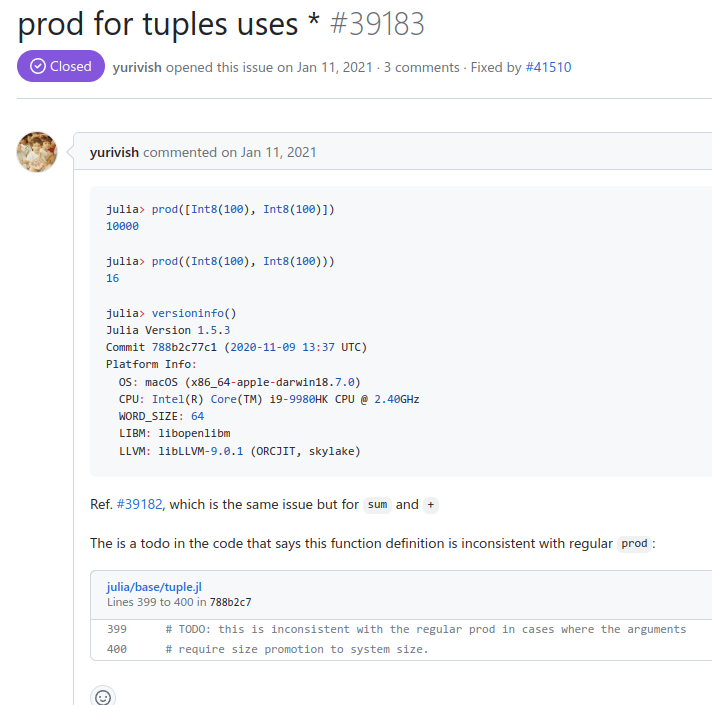

- https://github.com/JuliaLang/julia/issues/39183


In [2]:
display(prod([Int8(100), Int8(100)]))
display(prod((Int8(100), Int8(100))))

10000

10000

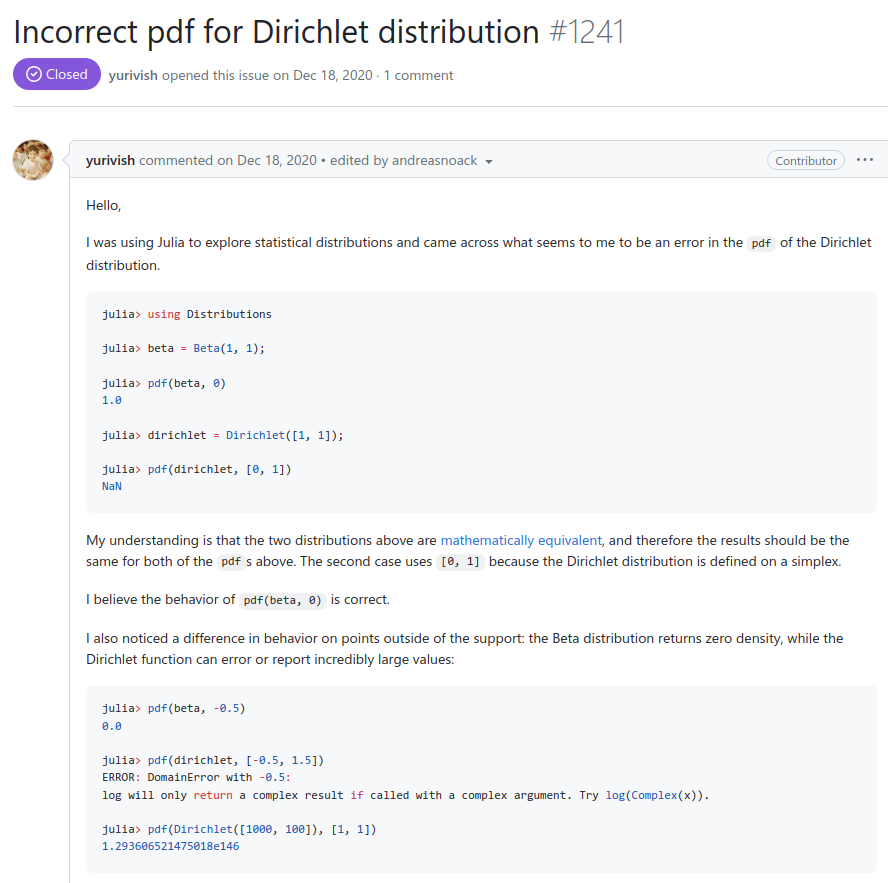

- https://github.com/JuliaStats/Distributions.jl/issues/1241

My understanding is that the two distributions above are mathematically equivalent, and therefore the results should be the same for both of the pdfs above. The second case uses [0, 1] because the Dirichlet distribution is defined on a simplex.

I believe the behavior of pdf(beta, 0) is correct.

In [1]:
using Distributions;
beta = Beta(1, 1);

display(pdf(beta, 0));
dirichlet = Dirichlet([1, 1]);

display(pdf(dirichlet, [0, 1]));

1.0

1.0

I also noticed a difference in behavior on points outside of the support: the Beta distribution returns zero density, while the Dirichlet function can error or report incredibly large values:

In [5]:
display(pdf(beta, -0.5));

display(pdf(dirichlet, [-0.5, 1.5]));

display(pdf(Dirichlet([1000, 100]), [1, 1]));

0.0

0.0

0.0

In [8]:
using StatsBase;
let counts = zeros(5)
   for _ in 1:10^5
       let a = [1, 2, 3, 4, 5]
           for samp in StatsBase.fisher_yates_sample!(a, a)
               counts[samp] += 1
           end
       end
   end
   counts
end

LoadError: ArgumentError: output array x must not share memory with input array a